In [5]:
import pandas as pd
import numpy as np
import toolbox as tbx
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

<h1  style= "background-color: gray;
                 color:white;
            text-align: center; 
            font-family:Helvetica, Arial, verdana, sans-serif"> Modélisation </h1>
<br>

In [6]:
!which python

/Users/alhassanneahmedap59_cb/git/perso/Projects/scoring-model/.venv/bin/python


In this section we are going to test 3 classifications algorithm such as :
- Neural network
- Logistic regression
- XGboost

In the exploration part, we noticed that we are dealing with embalanced data, therefore some heavy preprocessing we be needed.
If u are dealing with imbalanced data, u have 3 possible solutionsto handle that situation in machine learning:
1. **Undersampling** : by removing observations from the majority class to rebalance the dataset.
2. **Oversampling** : by removing observations from the minority class to rebalance the dataset
3. **Weight_balanced** : by using hyperparametrization method

,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,CC_NAME_CONTRACT_STATUS_SIGNED_MAX,CC_NAME_CONTRACT_STATUS_SIGNED_MEAN,CC_NAME_CONTRACT_STATUS_SIGNED_SUM,CC_NAME_CONTRACT_STATUS_SIGNED_VAR,CC_NAME_CONTRACT_STATUS_NAN_MIN,CC_NAME_CONTRACT_STATUS_NAN_MAX,CC_NAME_CONTRACT_STATUS_NAN_MEAN,CC_NAME_CONTRACT_STATUS_NAN_SUM,CC_NAME_CONTRACT_STATUS_NAN_VAR,CC_COUNT
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,1.0,0.0,0.0,0.0,0.0,202500.0,406597.5,24700.5,351000.0,0.018801,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0
100003,0.0,1.0,0.0,1.0,0.0,270000.0,1293502.5,35698.5,1129500.0,0.003541,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0
100004,0.0,0.0,1.0,0.0,0.0,67500.0,135000.0,6750.0,135000.0,0.010032,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0
100006,0.0,1.0,0.0,0.0,0.0,135000.0,312682.5,29686.5,297000.0,0.008019,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
100007,0.0,0.0,0.0,0.0,0.0,121500.0,513000.0,21865.5,513000.0,0.028663,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0


Nombre de colonnes :  796 

Nombre de lignes :  349126 



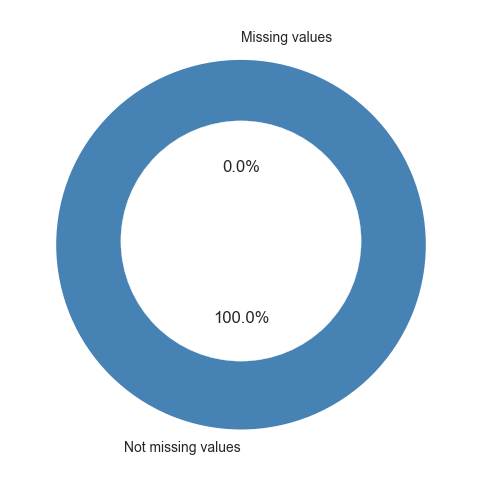

Nombre total de valeurs manquantes :  0 



In [8]:

data = pd.read_csv('../data/df_final.csv', index_col='SK_ID_CURR')
display(data.head())
tbx.describe_data(data)   

## 1. Preprocessing

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
# columns names harmonis
data.columns = list(map(lambda x: str(x).replace(" ", "_").replace("-", "_").replace("_/_", "_").upper(),
                      data.columns))
import re
data = data.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
# Divide in training/validation and test data

data.head()

,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,CC_NAME_CONTRACT_STATUS_SIGNED_MAX,CC_NAME_CONTRACT_STATUS_SIGNED_MEAN,CC_NAME_CONTRACT_STATUS_SIGNED_SUM,CC_NAME_CONTRACT_STATUS_SIGNED_VAR,CC_NAME_CONTRACT_STATUS_NAN_MIN,CC_NAME_CONTRACT_STATUS_NAN_MAX,CC_NAME_CONTRACT_STATUS_NAN_MEAN,CC_NAME_CONTRACT_STATUS_NAN_SUM,CC_NAME_CONTRACT_STATUS_NAN_VAR,CC_COUNT
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,1.0,0.0,0.0,0.0,0.0,202500.0,406597.5,24700.5,351000.0,0.018801,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0
100003,0.0,1.0,0.0,1.0,0.0,270000.0,1293502.5,35698.5,1129500.0,0.003541,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0
100004,0.0,0.0,1.0,0.0,0.0,67500.0,135000.0,6750.0,135000.0,0.010032,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0
100006,0.0,1.0,0.0,0.0,0.0,135000.0,312682.5,29686.5,297000.0,0.008019,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
100007,0.0,0.0,0.0,0.0,0.0,121500.0,513000.0,21865.5,513000.0,0.028663,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0


Train set shape : (279300, 794) 
Test set shape: (69826, 794) .



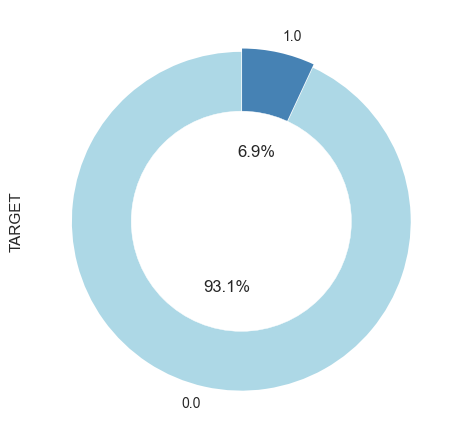

In [11]:
# Set up datasets for modeling
X, y = data.iloc[:, 1:-1], data.iloc[:, 0]

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.8, random_state=42, 
                                                    stratify=y)

print("Train set shape : {} \nTest set shape: {} .\n".format(X_train.shape,
                                                            X_test.shape))

# Check target 
y.value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, explode = (0, 0.02), colors=["lightblue","steelblue"], pctdistance=0.4, labeldistance=1.1)
circle = plt.Circle( (0,0), 0.65, color='white')
p=plt.gcf()
p.gca().add_artist(circle)
plt.show()

## 2. Modeling

In [32]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn import metrics
from urllib.parse import urlparse
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib
from sklearn.metrics import classification_report

In [33]:
import mlflow

In [35]:
from sklearn.linear_model import LogisticRegression
import mlflow
# Définition d'une expérience (Une expérience peut contenir plusieurs *runs*)
mlflow.set_experiment("logistic_reg_experiments")
mlflow.sklearn.autolog() # Ici on fait appel à l'API MLflow qui intégre les algos de Scikit-Learn.
                        # C'est grâce à ce code qu'on enregistre toutes les métriques et métadonnées de cette expérience (Module MLflow Tracking)
with mlflow.start_run(run_name = 'reg_logistic_defaut'):
  clf = LogisticRegression()
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  # save the model to disk
  joblib.dump(clf, '../models/reg_logistic_defaut.sav')
  print('*'*25,'Experiment 1 classification report (default)','*'*25)
  print(classification_report(y_test, y_pred))
  
  
# Création d'un second run dans la même expérience
with mlflow.start_run(run_name = 'reg_logistic_max_iter_200'):
  clf2 = LogisticRegression(max_iter=200)
  clf2.fit(X_train, y_train)
  y_pred = clf2.predict(X_test)
  # save the model to disk
  joblib.dump(clf, '../models/reg_logistic_max_iter_200.sav')
  print('*'*25,'Experiment 2 classification report (max_iter=200)','*'*25)
  print(classification_report(y_test, y_pred))
  

2023/03/26 07:28:33 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of sklearn. If you encounter errors during autologging, try upgrading / downgrading sklearn to a supported version, or try upgrading MLflow.


************************* Experiment 1 classification report (default) *************************
              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96     64980
         1.0       0.11      0.01      0.01      4846

    accuracy                           0.93     69826
   macro avg       0.52      0.50      0.49     69826
weighted avg       0.87      0.93      0.90     69826

************************* Experiment 2 classification report (max_iter=200) *************************
              precision    recall  f1-score   support

         0.0       0.93      1.00      0.96     64980
         1.0       0.18      0.01      0.01      4846

    accuracy                           0.93     69826
   macro avg       0.56      0.50      0.49     69826
weighted avg       0.88      0.93      0.90     69826



In [21]:
with mlflow.start_run(run_name = 'reg_logistic_defaut'):
  clf = LogisticRegression()
  clf.fit(X_train, y_train)
  
  y_pred = clf.predict(X_test)

  # Compute metrics
  accuracy = metrics.accuracy_score(y_test, y_pred)
  precision = metrics.precision_score(y_test, y_pred)
  recall = metrics.recall_score(y_test, y_pred)
  f1 = metrics.f1_score(y_test, y_pred)
  auc = metrics.roc_auc_score(y_test, y_pred)

  print("  accuracy: %s" % accuracy)
        
  # logging metrics
  mlflow.log_metric('accuracy', accuracy)
  mlflow.log_metric('precision', precision)
  mlflow.log_metric('recall', recall)
  mlflow.log_metric('auc', auc)
  mlflow.log_metric('f1', f1)

  tracking_url_type_store = urlparse(mlflow.get_tracking_uri()).scheme
  # save the model to disk
  joblib.dump(clf, '../models/reg_logistic_defaut.sav')

  accuracy: 0.9264457365451264


In [25]:
test =  joblib.load('../models/reg_logistic_defaut.sav')

In [31]:
y_pred = test.predict(X_test)



 


              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96     64980
         1.0       0.11      0.01      0.01      4846

    accuracy                           0.93     69826
   macro avg       0.52      0.50      0.49     69826
weighted avg       0.87      0.93      0.90     69826



In [23]:
!mlflow ui

[2023-03-26 07:08:37 +0200] [10533] [INFO] Starting gunicorn 20.1.0
[2023-03-26 07:08:37 +0200] [10533] [INFO] Listening at: http://127.0.0.1:5000 (10533)
[2023-03-26 07:08:37 +0200] [10533] [INFO] Using worker: sync
[2023-03-26 07:08:37 +0200] [10534] [INFO] Booting worker with pid: 10534
[2023-03-26 07:08:37 +0200] [10535] [INFO] Booting worker with pid: 10535
[2023-03-26 07:08:37 +0200] [10536] [INFO] Booting worker with pid: 10536
[2023-03-26 07:08:37 +0200] [10537] [INFO] Booting worker with pid: 10537
^C
[2023-03-26 07:08:51 +0200] [10533] [INFO] Handling signal: int
[2023-03-26 07:08:51 +0200] [10536] [INFO] Worker exiting (pid: 10536)
[2023-03-26 07:08:51 +0200] [10535] [INFO] Worker exiting (pid: 10535)
[2023-03-26 07:08:51 +0200] [10534] [INFO] Worker exiting (pid: 10534)
[2023-03-26 07:08:51 +0200] [10537] [INFO] Worker exiting (pid: 10537)


In [36]:
import mlflow
import mlflow.sklearn

#mlflow server --backend-store-uri sqlite:///mlflow.db
mlflow.set_tracking_uri("sqlite:///mlflow.db")
mlflow.set_experiment("traning-experiments")


ModuleNotFoundError: No module named 'mlflow.store.tracking.sqlalchemy_store'

In [13]:
def mlflow_workflow(model_name, experiment_model_name,X_train, X_test, y_train, y_test):    
    with mlflow.start_run():
        model = model_name
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)

        # Compute metrics
        accuracy = metrics.accuracy_score(y_test, y_pred)
        precision = metrics.precision_score(y_test, y_pred)
        recall = metrics.recall_score(y_test, y_pred)
        f1 = metrics.f1_score(y_test, y_pred)
        auc = metrics.roc_auc_score(y_test, y_pred)

        print("  accuracy: %s" % accuracy)
        
        # logging metrics
        mlflow.log_metric('accuracy', accuracy)
        mlflow.log_metric('precision', precision)
        mlflow.log_metric('recall', recall)
        mlflow.log_metric('auc', auc)
        mlflow.log_metric('f1', f1)

        tracking_url_type_store = urlparse(mlflow.get_tracking_uri()).scheme

        # Model registry does not work with file store
        if tracking_url_type_store != "file":
            # Register the model
            # There are other ways to use the Model Registry, which depends on the use case,
            # please refer to the doc for more information:
            # https://mlflow.org/docs/latest/model-registry.html#api-workflow
            mlflow.sklearn.log_model(model, "model", registered_model_name=experiment_model_name)
        else:
            mlflow.sklearn.log_model(model, "model")


In [14]:
mlflow_workflow(LogisticRegression(),"Logistic Regression", X_train, X_test, y_train, y_test)

  accuracy: 0.9264457365451264


2023/03/25 14:24:56 INFO mlflow.store.db.utils: Creating initial MLflow database tables...
2023/03/25 14:24:56 INFO mlflow.store.db.utils: Updating database tables
INFO  [alembic.runtime.migration] Context impl SQLiteImpl.
INFO  [alembic.runtime.migration] Will assume non-transactional DDL.
Successfully registered model 'Logistic Regression'.
2023/03/25 14:24:56 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: Logistic Regression, version 1
Created version '1' of model 'Logistic Regression'.


In [ ]:
with mlflow.start_run():
    # Pipeline 
    model = Pipeline([('scaler', MinMaxScaler()), ('logistic', LogisticRegression())])
    model.fit(X_train, y_train)
    
    # Prédictions
    y_pred = model.predict(X_test)
    
    # Metrics
    accuracy = metrics.accuracy_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    auc = metrics.roc_auc_score(y_test, y_pred)
    
    # logging parameters
    #flow.log_param('param', param)
    
    # logging metrics
    mlflow.log_metric('accuracy', accuracy)
    mlflow.log_metric('precision', precision)
    mlflow.log_metric('recall', recall)
    mlflow.log_metric('auc', auc)
    mlflow.log_metric('f1', f1)
    
    mlflow.sklearn.log_model(model, 'model')
    #mlflow.end_run()
    
    # tracking_uri = flow.get_tracking_uri()
    # print("Current tracking uri: {}".format(tracking_uri))

In [ ]:
from sklearn.linear_model import LogisticRegression
import mlflow
# Définition d'une expérience (Une expérience peut contenir plusieurs *runs*)
mlflow.set_experiment("Reg_Logistic_Models")
mlflow.sklearn.autolog() # Ici on fait appel à l'API MLflow qui intégre les algos de Scikit-Learn.
                        # C'est grâce à ce code qu'on enregistre toutes les métriques et métadonnées de cette expérience (Module MLflow Tracking)
with mlflow.start_run(run_name = 'reg_logistic_defaut'):
  clf = LogisticRegression()
  clf.fit(X_train, y_train)